In [1]:
#import library
import pandas as pd
import numpy as np
import math
import utils
import statsmodels.api as sm

In [2]:
df_data_set = pd.read_csv('Data/shcmp multi variable for HAR.csv')
df_data_set['Date'] = pd.to_datetime(df_data_set['Date'])
df_data_set.set_index('Date', inplace=True)
df_data_set.head(5)

,Realized Volatility,Constant,RV_lag1,5MA_RV,22MA_RV,Abs_Bias,squared_pct_chg,abs_overnight_info
Date,,,,,,,,
2005-02-03,3.711811,1,3.041918,1.114210,0.943433,0.030942,5.3467,0.001048
2005-02-04,1.455927,1,3.711811,1.766252,1.082825,0.020110,-0.8138,-0.002981
2005-02-16,1.203328,1,1.455927,1.968796,1.090226,0.032456,2.1490,0.005510
2005-02-17,0.737522,1,1.203328,2.064023,1.122296,0.026108,0.7782,0.000897
2005-02-18,0.478975,1,0.737522,2.030101,1.104006,0.009802,-0.2147,-0.000368


In [3]:
X = df_data_set.drop('Realized Volatility',1)
Y = df_data_set['Realized Volatility']

Implementing HAR-RV model # by Corsi (2009)

The HAR-RV model is a regression-based model that uses lagged realized volatility
  as predictor variables to forecast the volatility of a financial asset. 
 The model assumes that the volatility of an asset depends on its own past volatility as 
 well as the past volatility of related assets and the overall market volatility. 

 RV_t = α_0 + α_1 RV_{t-1} + α_2 RV_{t-5} + α_3 RV_{t-22}  + ε_t



In [4]:
#Split the data into train set and test set
TEST_LEN = 439
Y_train, Y_test = Y[:-TEST_LEN], Y[-TEST_LEN:]
X_train, X_test = X[:-TEST_LEN], X[-TEST_LEN:]

In [5]:
X.shape, X_train.shape, Y_test.shape

((4388, 7), (3949, 7), (439,))

In [6]:
# Start Linear regression
mod = sm.OLS(Y_train,X_train)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Realized Volatility   R-squared:                       0.538
Model:                             OLS   Adj. R-squared:                  0.537
Method:                  Least Squares   F-statistic:                     763.7
Date:                 Sun, 09 Apr 2023   Prob (F-statistic):               0.00
Time:                         14:12:03   Log-Likelihood:                -8065.2
No. Observations:                 3949   AIC:                         1.614e+04
Df Residuals:                     3942   BIC:                         1.619e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Constant               0.1657      0.040      4.167      0.000       0.088       0.244
RV_lag1                0.3122      0.019     16.719      0.000       0.276       0.349
5MA_RV                 0.3348      0.029     11.364      0.000       0.277       0.393
22MA_RV                0.2431      0.028      8.810      0.000       0.189       0.297
Abs_Bias               2.8564      2.560      1.116      0.265      -2.162       7.875
squared_pct_chg       -0.2664      0.028     -9.537      0.000      -0.321      -0.212
abs_overnight_info   -28.8726      4.245     -6.801      0.000     -37.195     -20.550
==============================================================================
Omnibus:                     4200.273   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           482945.652
Skew:                           5.137   Prob(JB):                         0.00
Kurtosis:                      56.193   Cond. No.                         677.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y_pred = res.predict(X_test)

In [8]:
utils.Predictions_Error(Predictions_val=y_pred,Actual_val=Y_test)

MAE =  0.3367883820567274
MSE =  0.23691095676796586
RMSE =  0.48673499644875123
R_2 =  0.3618412577988871
RMSPE =  1.0356783518042478
MSLE =  0.05588521267157492


MAE =  0.30221074598776043
MSE =  0.2546077265064707
RMSE =  0.5045866887923924
R_2 =  0.3123796859147281
RMSPE =  0.9269844040011631
MSLE =  0.04782273607008992

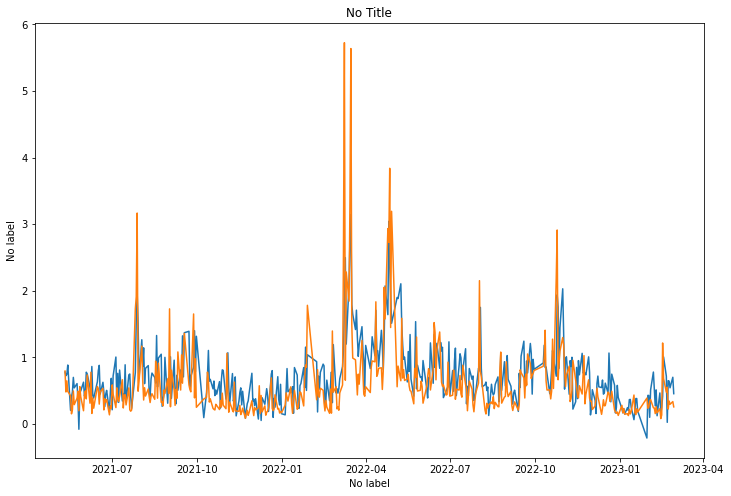

In [9]:
utils.plot_figure(y_pred,Y_test)

In [12]:
train_pred = res.predict(X_train)

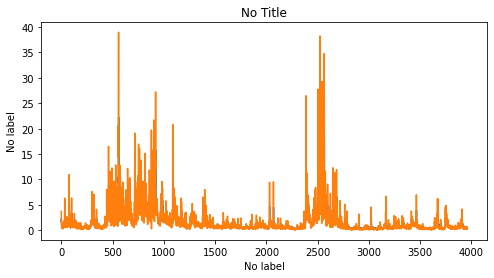

In [13]:
utils.plot_figure(data=train_pred,data2=Y_train)

In [14]:
utils.Predictions_Error(Predictions_val=train_pred,Actual_val=Y_train)

MAE =  0.7979512346517873
MSE =  3.6884765848300236
RMSE =  1.9205407011646547
R_2 =  0.5088291924540984
RMSPE =  1.0077596480828324
MSLE =  0.09895415886722511
